In [1]:
# Define the list of 17 joints
h36m_keypoints = {
    0: 'Hip',
    1: 'RHip',
    2: 'RKnee',
    3: 'RFoot',
    6: 'LHip',
    7: 'LKnee',
    8: 'LFoot',
    12: 'Spine',
    13: 'Neck',
    14: 'Nose',
    15: 'Head',
    17: 'LShoulder',
    18: 'LElbow',
    19: 'LWrist',
    25: 'RShoulder',
    26: 'RElbow',
    27: 'RWrist',
}

In [2]:
import copy
import os
import numpy as np
import sys
from glob import glob
import time
import random

import cv2
from torch.utils.data import Dataset
import matplotlib.pyplot as plt

sys.path.append('../')

from data_process.utils import load_raw_img
from utils.misc import make_folder
from data_process.h36m_dataset import H36M_Dataset

In [3]:
from config.configs import get_configs

configs = get_configs()

h36m_dataset = H36M_Dataset(configs.datasets_dir, configs.train.subjects, configs.train.cameras,
                            configs.train.act_names, configs.train.act_ids, configs.protocol_name,
                            configs.n_images, configs.inp_res, configs.train.scale_range, img_transform=None,
                            is_train_mode=False, is_debug_mode=False)

loading image paths...preparing
loading image paths...done
number of images: 1322
loading annotations...preparing
loading annotations...done


/media/nmdung/SSD_4TB_Disk_1/kpts_works/hpe_3D/datasets/human36M/protocol_1/S1/Walking_1/imageSequence/55011271/img_000001.jpg
sbj: S1, cmr: 55011271, act_fullname: Walking_1


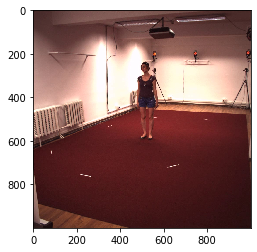

In [4]:
sample_img_path = h36m_dataset.image_paths[0]

print(sample_img_path)
sample_img_path_parts = sample_img_path.split('/')
img_fn = sample_img_path_parts[-1][:-4]
cmr = sample_img_path_parts[-2]
act_fullname = sample_img_path_parts[-4]
sbj = sample_img_path_parts[-5]
img = load_raw_img(sample_img_path)
plt.imshow(img)
print('sbj: {}, cmr: {}, act_fullname: {}'.format(sbj, cmr, act_fullname))

In [5]:
sample_annos = h36m_dataset.annos[sbj][act_fullname]
# sample_annos = h36m_dataset.annos[sbj]['Walking_2']

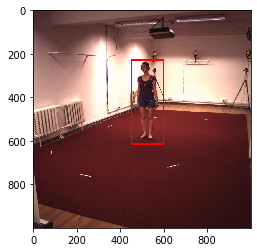

In [6]:
img = load_raw_img(sample_img_path)
xmin, ymin, xmax, ymax = sample_annos[img_fn]['bboxes'][cmr]
img = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 5)
plt.imshow(img)

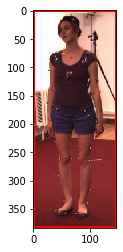

In [7]:
img_crop = img[ymin:ymax, xmin:xmax]
plt.imshow(img_crop)

In [8]:
sample_poses_2d_mono = sample_annos[img_fn]['poses_2d_mono'][cmr]

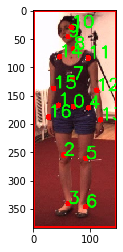

In [9]:
img = load_raw_img(sample_img_path)
xmin, ymin, xmax, ymax = sample_annos[img_fn]['bboxes'][cmr]
img = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 5)
img_crop = img[ymin:ymax, xmin:xmax]
for kpt_idx, kpt in enumerate(sample_poses_2d_mono):
    kpt_x, kpt_y = int(kpt[0]) - xmin, int(kpt[1]) - ymin
#     kpt_x, kpt_y = int(kpt[0]), int(kpt[1])
    if kpt_idx in range(0, 18):
        img_crop = cv2.circle(img_crop, (kpt_x, kpt_y), 5, (255, 0, 0), -1)
        img_crop = cv2.putText(img_crop, str(kpt_idx), (kpt_x, kpt_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
plt.imshow(img_crop)

In [10]:
img_path, img, bbox, poses_2d_mono_annos, pose_3d_mono_annos = h36m_dataset.__getitem__(0)
print('img_path: {}'.format(img_path))

img_path: /media/nmdung/SSD_4TB_Disk_1/kpts_works/hpe_3D/datasets/human36M/protocol_1/S1/Walking_1/imageSequence/55011271/img_000001.jpg


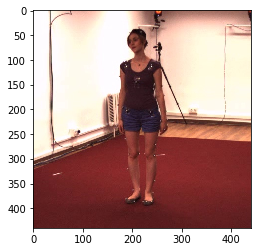

In [11]:
plt.imshow(img)

In [12]:
print(pose_3d_mono_annos)

[[   0.            0.            0.        ]
 [-127.86707256  -15.12494442   33.11458289]
 [ -83.59801231  410.16812064  148.53423827]
 [ -43.94543661  838.15718482  295.3556632 ]
 [ 127.86729846   15.12497114  -33.11464139]
 [ 106.44515196  441.00738085   86.55459486]
 [ 110.87873716  866.07193253  246.5673976 ]
 [  -5.03431087 -232.55618773  -20.02219846]
 [   3.40781603 -484.42393926  -70.8188549 ]
 [ -46.03286349 -574.33439255 -135.20365687]
 [ -17.03145334 -665.38485047  -71.21737275]
 [ 124.49737686 -399.40978891 -101.1709526 ]
 [ 193.69991654 -132.82912431  -57.33764626]
 [ 226.87105954  116.48269893  -46.70654134]
 [-117.21686836 -423.91931818   -3.00019008]
 [-168.70019403 -169.79946133   99.73163731]
 [-209.79975088   78.14171036  113.99102986]]


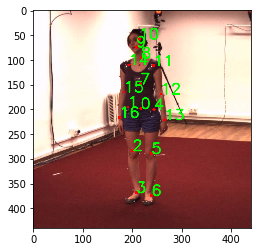

In [13]:
for kpt_idx, kpt in enumerate(poses_2d_mono_annos):
    kpt_x, kpt_y = int(kpt[0]), int(kpt[1])
    if kpt_idx in range(0, 18):
        img = cv2.circle(img, (kpt_x, kpt_y), 3, (255, 0, 0), -1)
        img = cv2.putText(img, str(kpt_idx), (kpt_x, kpt_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
plt.imshow(img)